In [380]:
import numpy as np
import pandas as pd
import scipy
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import plotly
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import docx
import datetime as dt
import pickle
import random
import math
import time
import os
import re
import colorsys
import arrow
import locale
import requests
import collections
import numbers
import decimal

from warnings import simplefilter

from scipy import stats
from scipy.interpolate import make_interp_spline, BSpline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
from plotly.subplots import make_subplots
# from pathlib import Path

In [381]:
path_current = os.getcwd()
path_main = os.path.sep.join(path_current.split(os.path.sep)[:-2])

In [382]:
path_current

'/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/# economy-rus-dash/notebooks/visualization'

In [383]:
path_main

'/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/# economy-rus-dash'

### To main directory

In [384]:
# change directory to main path
os.chdir(path_main)

### Load libraries, functions, palette, theme

In [385]:
# load libraries and palette
%run __theme.ipynb

In [386]:
# load functions
# from __functions import *
%run __functions.ipynb

In [387]:
# start stopwatch
start = stopwatch_start()

### Variables

In [388]:
path_img = path_main + '/docs/img/'

In [389]:
path_files = path_main + '/files'

In [390]:
path_excel_csv = path_main + '/excel-csv'

### Load Files

In [391]:
economics_data = loadit('economics_data', path=path_files, create_empty_dict=True)

In [392]:
incomes = economics_data['households_income_difference'].copy()

### Back to notebook directory

In [393]:
# back to current path
os.chdir(path_current)

# Домохозяйства

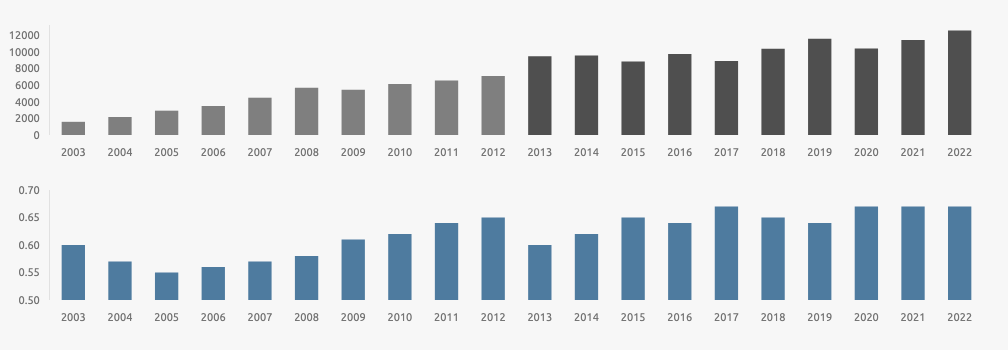

In [394]:
fig = pl_subplots(rows=2, cols=1, figsize=(750, 350))

fig.add_trace(
    go.Bar(
        x=incomes.index[:10],
        y=incomes['delta'][:10],
        width=0.5,
        marker_color=palette[-4], showlegend=False, name=''), row=1, col=1)
fig.add_trace(
    go.Bar(
        x=incomes.index[10:],
        y=incomes['delta'][10:],
        width=0.5,
        marker_color=palette[0], showlegend=False, name=''), row=1, col=1)

fig.add_trace(
    go.Bar(
        x=incomes.index,
        y=incomes['country/town'],
        width=0.5,
        marker_color=saturate_color(palette[2], 0.75, 'HEX'),
        showlegend=False, name=''), row=2, col=1)

fig.update_xaxes(dtick=1, showspikes=False, showline=False, row=1, col=1)
fig.update_xaxes(dtick=1, showspikes=False, showline=False, row=2, col=1)
fig.update_yaxes(dtick=2000, tickformat='.0f', row=1, col=1)
fig.update_yaxes(range=[0.5,0.7], dtick=0.05, tickformat='.2f', row=2, col=1)

pl_grid(False)

fig.show(config=config)

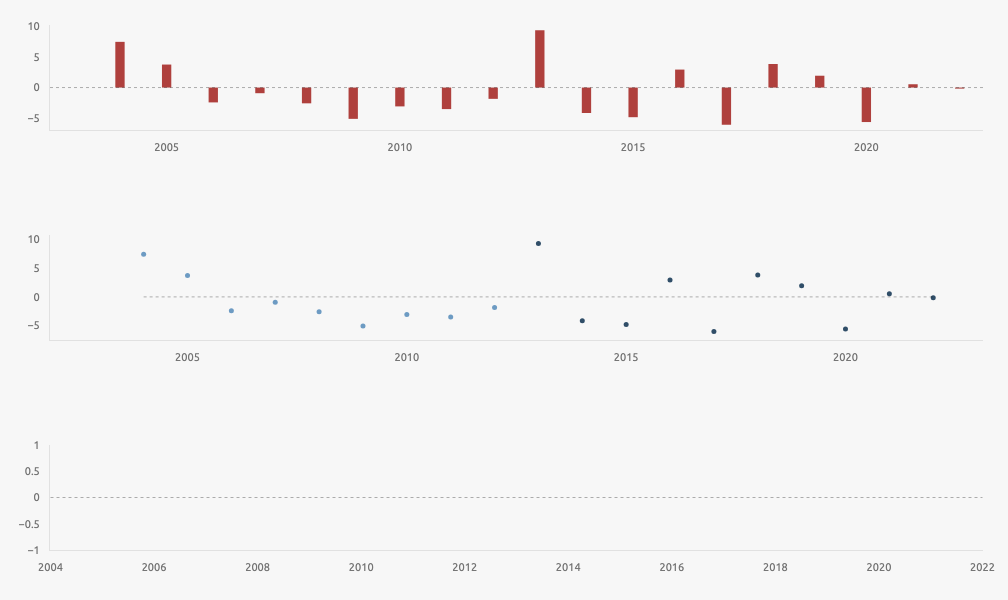

In [460]:
fig = pl_subplots(rows=3, cols=1, figsize=(750, 600))

fig.add_trace(
    go.Bar(
        x=incomes.index,
        y=incomes['delta_pct'],
        width=0.2,
        marker_color=palette[1], showlegend=False, name=''), row=1, col=1)
pl_hline(row=1, col=1)
# fig.add_shape(type='line',
#                 x0=2004,
#                 y0=0,
#                 x1=2022,
#                 y1=0,
#                 line=dict(color='black', width=1),
#               opacity=0.3,
#                 xref='x',
#                 yref='y',
#               row=1,
#               col=1
# )


# fig.add_hline(
#         y=0, line_dash='3px', opacity=0.3,
#         line=dict(width=1, color='red'), row=2, col=1)
fig.add_trace(
    go.Scatter(
        x=incomes.index[:10],
        y=incomes['delta_pct'][:10],
        mode='markers', marker=dict(size=5, color=palette[13]),
        showlegend=False, name=''), row=2, col=1)
fig.add_trace(
    go.Scatter(
        x=incomes.index[10:],
        y=incomes['delta_pct'][10:],
        mode='markers', marker=dict(size=5, color=palette[10]),
        showlegend=False, name=''), row=2, col=1)
fig.add_shape(type='line',
                x0=2004,
                y0=0,
                x1=2022,
                y1=0,
                line=dict(color='black', width=1, dash='3px'),
              opacity=0.3,
                xref='x',
                yref='y',
              row=2,
              col=1
)

# fig.add_shape(type='line',
#                 x0=2004,
#                 y0=0,
#                 x1=2022,
#                 y1=0,
#                 line=dict(color='#000000', width=1, dash='3px'),
#               opacity=0.3,
#                 xref='x',
#                 yref='y',
#               row=2,
#               col=1
# )

fig.add_shape(type='line',
                x0=2004,
                y0=0,
                x1=2022,
                y1=0,
                line=dict(color='#000000', width=1, dash='3px'),
              opacity=0.3,
                xref='x',
                yref='y',
              row=3,
              col=1
)



# fig.update_xaxes(range=[2003.5, 2022.5], dtick=1, showspikes=False, showline=False, row=1, col=1)
# fig.update_xaxes(range=[2003.5, 2022.5], dtick=1, showspikes=False, showline=False, row=2, col=1)
# fig.update_yaxes(dtick=2000, tickformat='.0f', row=1, col=1)
# fig.update_yaxes(range=[0.5,0.7], dtick=0.05, tickformat='.2f', row=2, col=1)

pl_grid(False)

fig.show(config=config)

In [20]:
fig = go.Figure(layout=dict(width=750, height=300))

fig.add_trace(
    go.Scatter(
        x=wheat_smoothed.index,
        y=wheat_smoothed.values.ravel(),
        mode='lines', line_color=palette[-5], line_dash='5px',
        hoverinfo='skip', name='Цена пшеницы'))
fig.add_trace(
    go.Scatter(
        x=wheat.index,
        y=wheat,
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[0],
        showlegend=False, name='Цена пшеницы'))
fig.add_trace(
    go.Scatter(
        x=bread_smoothed.index,
        y=bread_smoothed.values.ravel(),
        mode='lines', line_color=palette[6], hoverinfo='skip', name='Цена хлеба'))
fig.add_trace(
    go.Scatter(
        x=bread.index,
        y=bread,
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[6], name='Цена хлеба', showlegend=False))

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.1)

pl_hline(1)

fig.show(config=config)

### Цена говядины

In [21]:
fig = go.Figure(layout=dict(width=750, height=300))

fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['крупный рогатый скот'], datetime_index=True).index,
        y=smoothed(prices_food_growth['крупный рогатый скот'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[-5], opacity=1, line_dash='5px', hoverinfo='skip',
        name='Цена КРС'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['крупный рогатый скот'].index,
        y=prices_food_growth['крупный рогатый скот'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[0], showlegend=False,
        name='Цена КРС'))
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['говядина (кроме бескостного мяса), кг'], datetime_index=True).index,
        y=smoothed(prices_food_growth['говядина (кроме бескостного мяса), кг'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[1], hoverinfo='skip',
        name='Цена говядины'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['говядина (кроме бескостного мяса), кг'].index,
        y=prices_food_growth['говядина (кроме бескостного мяса), кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[1], showlegend=False,
        name='Цена говядины'))

pl_hline(1)

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.1)

fig.show(config=config)

### Цена свинины

In [22]:
fig = go.Figure(layout=dict(width=750, height=300))

fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['свиньи'], datetime_index=True).index,
        y=smoothed(prices_food_growth['свиньи'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[-5], opacity=1, line_dash='5px', hoverinfo='skip',
        name='Цена свиней у производителей'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['свиньи'].index,
        y=prices_food_growth['свиньи'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[0], showlegend=False,
        name='Цена свиней у производителей',))
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['свинина (кроме бескостного мяса), кг'], datetime_index=True).index,
        y=smoothed(prices_food_growth['свинина (кроме бескостного мяса), кг'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[8], hoverinfo='skip',
        name='Цена свинины'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['свинина (кроме бескостного мяса), кг'].index,
        y=prices_food_growth['свинина (кроме бескостного мяса), кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[8], showlegend=False,
        name='Цена свинины'))

pl_hline(1)

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.1)

fig.show(config=config)

### Цена курицы

In [23]:
fig = go.Figure(layout=dict(width=750, height=300))

fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['птица сельскохозяйственная живая'], datetime_index=True).index,
        y=smoothed(prices_food_growth['птица сельскохозяйственная живая'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[-5], opacity=1, line_dash='5px', hoverinfo='skip',
        name='Цена птицы у производителей'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['птица сельскохозяйственная живая'].index,
        y=prices_food_growth['птица сельскохозяйственная живая'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[0], showlegend=False,
        name='Цена птицы у производителей'))
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['куры охлажденные и мороженые, кг'], datetime_index=True).index,
        y=smoothed(prices_food_growth['куры охлажденные и мороженые, кг'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[7], hoverinfo='skip',
        name='Цена курицы'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['куры охлажденные и мороженые, кг'].index,
        y=prices_food_growth['куры охлажденные и мороженые, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[7], showlegend=False,
        name='Цена курицы'))

pl_hline(1)

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.1)

fig.show(config=config)

### Цена молочных продуктов

In [24]:
fig = go.Figure(layout=dict(width=750, height=320))

# сырое молоко
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['молоко сырое крупного рогатого скота'], datetime_index=True).index,
        y=smoothed(prices_food_growth['молоко сырое крупного рогатого скота'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[-5], opacity=1, line_dash='5px', hoverinfo='skip', name='Сырое молоко',))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['молоко сырое крупного рогатого скота'].index,
        y=prices_food_growth['молоко сырое крупного рогатого скота'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[0], showlegend=False, name='Сырое молоко',))
# сыр
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['сыры твердые, полутвердые и мягкие, кг'], datetime_index=True).index,
        y=smoothed(prices_food_growth['сыры твердые, полутвердые и мягкие, кг'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[2], hoverinfo='skip', name='Сыр'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['сыры твердые, полутвердые и мягкие, кг'].index,
        y=prices_food_growth['сыры твердые, полутвердые и мягкие, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[2], showlegend=False, name='Сыр'))
# сметана
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['сметана, кг'], datetime_index=True).index,
        y=smoothed(prices_food_growth['сметана, кг'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[3], hoverinfo='skip', name='Сметана'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['сметана, кг'].index,
        y=prices_food_growth['сметана, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[3], showlegend=False, name='Сметана'))
# йогурт
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['йогурт, кг'], datetime_index=True).index,
        y=smoothed(prices_food_growth['йогурт, кг'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[4], hoverinfo='skip', name='Йогрут'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['йогурт, кг'].index,
        y=prices_food_growth['йогурт, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[4], showlegend=False, name='Йогрут'))
# масло
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['масло сливочное, кг'], datetime_index=True).index,
        y=smoothed(prices_food_growth['масло сливочное, кг'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[1], hoverinfo='skip', name='Масло сливочное'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['масло сливочное, кг'].index,
        y=prices_food_growth['масло сливочное, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[1], showlegend=False, name='Масло сливочное'))
# творог
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['творог, кг'], datetime_index=True).index,
        y=smoothed(prices_food_growth['творог, кг'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[7], hoverinfo='skip', name='Творог'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['творог, кг'].index,
        y=prices_food_growth['творог, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[7], showlegend=False, name='Творог'))
# молоко пастеризованное
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л'], datetime_index=True).index,
        y=smoothed(prices_food_growth['молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=alpha_color(palette[0], 0.75, return_type='HEX'), hoverinfo='skip', name='Пастеризованное молоко'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л'].index,
        y=prices_food_growth['молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[0], showlegend=False, name='Пастеризованное молоко'))

pl_hline(1)

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.1)
fig.update_layout(legend=dict(entrywidth=90, entrywidthmode='pixels'))

fig.show(config=config)

### Цена овощей

In [25]:
fig = go.Figure(layout=dict(width=750, height=320))

# картофель
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['картофель, кг'], datetime_index=True).index,
        y=smoothed(prices_food_growth['картофель, кг'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[5], hoverinfo='skip',
        name='Картофель'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['картофель, кг'].index,
        y=prices_food_growth['картофель, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[5], showlegend=False,
        name='Картофель'))
# огурцы
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['огурцы свежие, кг'], datetime_index=True).index,
        y=smoothed(prices_food_growth['огурцы свежие, кг'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[3], hoverinfo='skip',
        name='Огурцы'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['огурцы свежие, кг'].index,
        y=prices_food_growth['огурцы свежие, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[3], showlegend=False,
        name='Огурцы'))
# помидоры
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['помидоры свежие, кг'], datetime_index=True).index,
        y=smoothed(prices_food_growth['помидоры свежие, кг'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[1], hoverinfo='skip',
        name='Помидоры'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['помидоры свежие, кг'].index,
        y=prices_food_growth['помидоры свежие, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[1], showlegend=False,
        name='Помидоры'))
# лук
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['лук репчатый, кг'], datetime_index=True).index,
        y=smoothed(prices_food_growth['лук репчатый, кг'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[2], hoverinfo='skip',
        name='Лук'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['лук репчатый, кг'].index,
        y=prices_food_growth['лук репчатый, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[2], showlegend=False,
        name='Лук'))
# морковь
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['морковь, кг'], datetime_index=True).index,
        y=smoothed(prices_food_growth['морковь, кг'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[9], hoverinfo='skip',
        name='Морковь'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['морковь, кг'].index,
        y=prices_food_growth['морковь, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[9], showlegend=False,
        name='Морковь'))
# овощи средняя цена
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['овощи'], datetime_index=True).index,
        y=smoothed(prices_food_growth['овощи'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[-5], opacity=1, line_dash='5px', hoverinfo='skip',
        name='Овощи (средняя цена производителей)'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['овощи'].index,
        y=prices_food_growth['овощи'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[0], showlegend=False,
        name='Овощи (средняя цена производителей)'))

pl_hline(1)

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.5)
fig.update_layout(legend=dict(entrywidth=90, entrywidthmode='pixels'))

fig.show(config=config)

### Цена куриных яиц

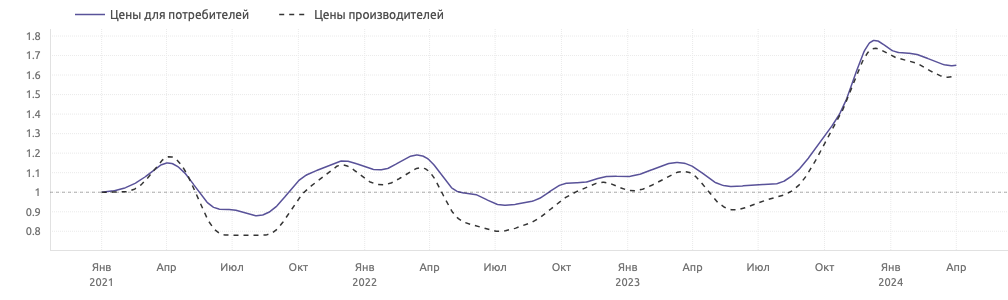

In [26]:
fig = go.Figure(layout=dict(width=750, height=300))

fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['яйца куриные, 10 шт.'], datetime_index=True).index,
        y=smoothed(prices_food_growth['яйца куриные, 10 шт.'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[7], hoverinfo='skip',
        name='Цены для потребителей'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['яйца куриные, 10 шт.'].index,
        y=prices_food_growth['яйца куриные, 10 шт.'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[7], showlegend=False,
        name='Цены для потребителей'))
fig.add_trace(
    go.Scatter(
        x=smoothed(prices_food_growth['яйца куриные в скорлупе свежие'], datetime_index=True).index,
        y=smoothed(prices_food_growth['яйца куриные в скорлупе свежие'],  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[-5], opacity=1, line_dash='5px', hoverinfo='skip',
        name='Цены производителей'))
fig.add_trace(
    go.Scatter(
        x=prices_food_growth['яйца куриные в скорлупе свежие'].index,
        y=prices_food_growth['яйца куриные в скорлупе свежие'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[0], showlegend=False,
        name='Цены производителей'))

pl_hline(1)

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.1)

fig.show(config=config)
# pl_savefig(figure=fig, name='prices-eggs', path=path_img, config=config, fmt='html')

### Execution time

In [27]:
stopwatch_stop(start)

Execution time: 0:00:02
